In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
ARCHIVE_DIR = r"D:\Visual Studio practice\emotion_detection\archive"
TRAIN_DIR = os.path.join(ARCHIVE_DIR, "train")
TEST_DIR = os.path.join(ARCHIVE_DIR, "test")

# Check existence
assert os.path.exists(TRAIN_DIR), "Train folder not found"
assert os.path.exists(TEST_DIR), "Test folder not found"
print("✅ Archive folder structure is correct.")

✅ Archive folder structure is correct.


In [4]:
import glob

def count_images(folder):
    label_counts = {}
    for label in sorted(os.listdir(folder)):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            count = len(glob.glob(os.path.join(label_path, "*.jpg")))
            label_counts[label] = count
    return label_counts

train_counts = count_images(TRAIN_DIR)
test_counts = count_images(TEST_DIR)

print("Train image counts by label:", train_counts)
print("Test image counts by label:", test_counts)

Train image counts by label: {'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}
Test image counts by label: {'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}


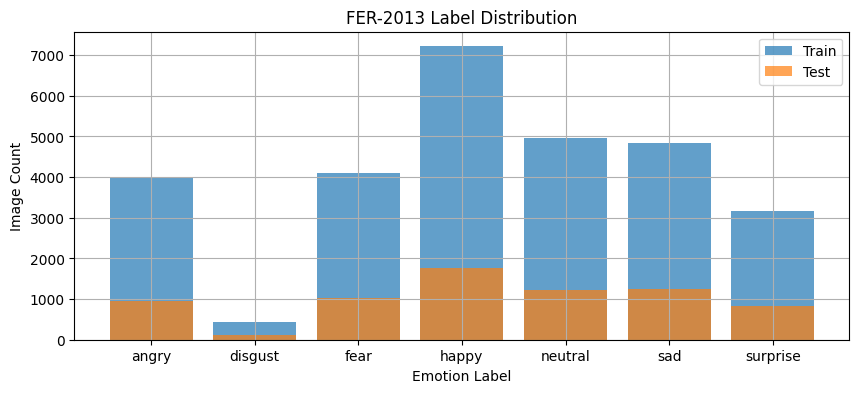

In [5]:
labels = list(train_counts.keys())
train_vals = list(train_counts.values())
test_vals = list(test_counts.values())

plt.figure(figsize=(10,4))
plt.bar(labels, train_vals, alpha=0.7, label="Train")
plt.bar(labels, test_vals, alpha=0.7, label="Test")
plt.xlabel("Emotion Label")
plt.ylabel("Image Count")
plt.title("FER-2013 Label Distribution")
plt.legend()
plt.grid(True)
plt.show()

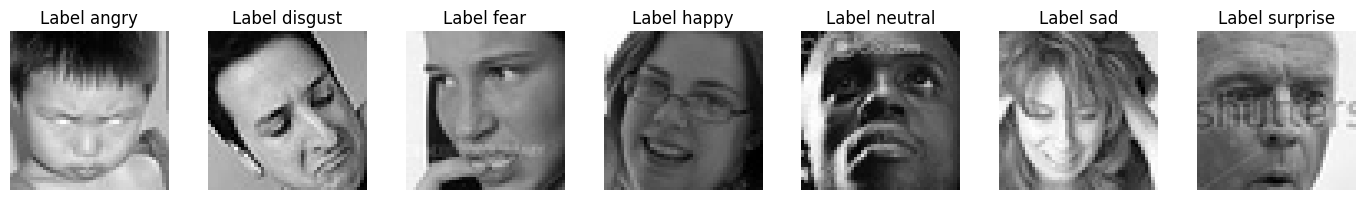

In [6]:
import cv2
import matplotlib.pyplot as plt

def show_samples(folder, num_per_class=1):
    fig, axes = plt.subplots(1, 7, figsize=(14, 2))
    for i, label in enumerate(sorted(os.listdir(folder))):
        label_path = os.path.join(folder, label)
        images = glob.glob(os.path.join(label_path, "*.jpg"))
        if images:
            img = cv2.imread(images[0], cv2.IMREAD_GRAYSCALE)
            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(f"Label {label}")
            axes[i].axis('off')
    plt.tight_layout()
    plt.show()

show_samples(TRAIN_DIR)